## Importando cosas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

## Soluciones

In [2]:
# Domain: r and theta
ri, rf = 0, 2
ti, tf = 0, 2*np.pi/3

# Parametres and iterations
dr, dt = 0.15, 0.15
n = 2000

In [3]:
def laplace_polar(ri, rf, ti, tf, dr, dt, lim_ti, lim_tf, lim_rf, n, default_val=0):
    theta, r = np.meshgrid(np.arange(ti,tf+dt,dt),np.arange(ri,rf+dr,dr))
    phi = np.full(theta.shape, default_val)

    phi[-1,:] = lim_rf(np.arange(ti,tf+dt,dt))
    phi[:,0], phi[:,-1] = lim_ti(np.arange(ri,rf+dr,dr)), lim_tf(np.arange(ri,rf+dr,dr))

    for _ in range(n):
        for i in range(1, phi.shape[0]-1):
            for j in range(1, phi.shape[1]-1):
                phi[i, j] = ((phi[i+1, j]+phi[i-1, j])/(2*dr**2) + (phi[i, j+1]+phi[i, j-1])/(2*(i*dr*dt)**2) + 
                             (phi[i+1, j] - phi[i-1, j])/(2*i*dr**2))/(1/dr**2 + 1/(i*dr*dt)**2)


    return theta, r, phi

### Punto 1: límites fijos

In [12]:
# Conditions and limits
lim_ti = lambda r: 0         # Theta = 0
lim_tf = lambda r: 100       # Theta = tf
lim_rf = lambda theta: 100   # r = rf

theta0, r0, phi0 = laplace_polar(ri, rf, ti, tf, dr, dt, lim_ti, lim_tf, lim_rf, n)

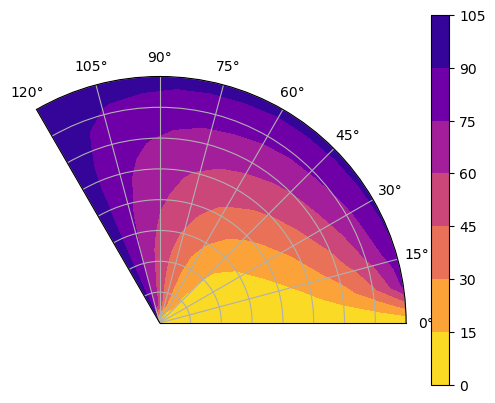

In [38]:
ax = plt.subplot(111, polar=True)
ax.set_yticklabels([])
ctf = ax.contourf(theta0, r0, phi0, cmap=cm.plasma_r)
plt.colorbar(ctf)
plt.axis([ti,tf,ri,rf])
plt.show()

### Punto 2

In [14]:
# Conditions and limits
lim_ti = lambda r: 40*np.sin(np.pi*r)           # Theta = 0
#lim_ti = lambda r: 10           # Theta = 0
lim_tf = lambda r: -40*np.sin(np.pi*r)          # Theta = tf
#lim_tf = lambda r: 10
#lim_rf = lambda theta: 80*np.sin(10*np.pi*theta)   # r = rf
lim_rf = lambda theta: 100*theta
default_val = -10

# Parametres and iterations
dr, dt = 0.2, 0.2
n = 10000

theta1, r1, phi1 = laplace_polar(ri, rf, ti, tf, dr, dt, lim_ti, lim_tf, lim_rf, n, default_val)

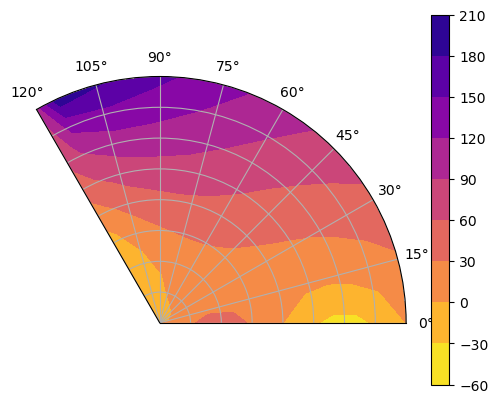

In [15]:
ax = plt.subplot(111, polar=True)
ax.set_yticklabels([])
ctf = ax.contourf(theta1, r1, phi1, cmap=cm.plasma_r)
plt.colorbar(ctf)
plt.axis([ti,tf,ri,rf])
plt.show()